In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint as pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

In [4]:
#Create Counter and list to store data
data = []
counter = 0

#Fill list with JSONS for each city and print processing messages
for city in cities:
    try:
        url = (f'http://api.openweathermap.org/data/2.5/weather?appid={api_key}&q={cities[counter]}')
        weather_json=requests.get(url)
        weather_json=weather_json.json()
        data.append(weather_json)
        print(f'Processing Record {counter + 1}| {cities[counter]}')
        counter = counter + 1
    except:
        print(f'City not found. Skipping...')
        counter = counter + 1

Processing Record 1| rikitea
Processing Record 2| rio verde de mato grosso
Processing Record 3| thompson
Processing Record 4| upernavik
Processing Record 5| sioux lookout
Processing Record 6| emerald
Processing Record 7| taoudenni
Processing Record 8| saleaula
Processing Record 9| dikson
Processing Record 10| ilulissat
Processing Record 11| vaini
Processing Record 12| inhambane
Processing Record 13| lahij
Processing Record 14| bethel
Processing Record 15| mataura
Processing Record 16| mar del plata
Processing Record 17| zhangye
Processing Record 18| katsuura
Processing Record 19| saskylakh
Processing Record 20| albany
Processing Record 21| hobart
Processing Record 22| caledon
Processing Record 23| louisville
Processing Record 24| qaqortoq
Processing Record 25| vostok
Processing Record 26| victoria
Processing Record 27| vila franca do campo
Processing Record 28| hanna
Processing Record 29| chopda
Processing Record 30| geraldton
Processing Record 31| adrar
Processing Record 32| lucera
Pr

Processing Record 255| ust-nera
Processing Record 256| la gaulette
Processing Record 257| dzhusaly
Processing Record 258| caconda
Processing Record 259| slave lake
Processing Record 260| gigmoto
Processing Record 261| zachagansk
Processing Record 262| dabat
Processing Record 263| baherden
Processing Record 264| vardo
Processing Record 265| whitehorse
Processing Record 266| marzuq
Processing Record 267| arraial do cabo
Processing Record 268| kita
Processing Record 269| charters towers
Processing Record 270| lloydminster
Processing Record 271| mount isa
Processing Record 272| castro
Processing Record 273| salalah
Processing Record 274| atbasar
Processing Record 275| port lincoln
Processing Record 276| kulunda
Processing Record 277| utete
Processing Record 278| belmonte
Processing Record 279| ulladulla
Processing Record 280| havelock
Processing Record 281| teguldet
Processing Record 282| lompoc
Processing Record 283| cherskiy
Processing Record 284| ebebiyin
Processing Record 285| acapulco

Processing Record 511| lagoa
Processing Record 512| blenheim
Processing Record 513| torit
Processing Record 514| peniche
Processing Record 515| beloha
Processing Record 516| kasongo-lunda
Processing Record 517| egvekinot
Processing Record 518| panzhihua
Processing Record 519| houma
Processing Record 520| nandu
Processing Record 521| rawannawi
Processing Record 522| yining
Processing Record 523| oudtshoorn
Processing Record 524| talara
Processing Record 525| rorvik
Processing Record 526| heiligenhafen
Processing Record 527| belison
Processing Record 528| xai-xai
Processing Record 529| westport
Processing Record 530| seymchan
Processing Record 531| wolfhagen
Processing Record 532| mama
Processing Record 533| santa isabel do rio negro
Processing Record 534| umm lajj
Processing Record 535| bredy
Processing Record 536| mwense
Processing Record 537| bokspits
Processing Record 538| hay river
Processing Record 539| karaul
Processing Record 540| cairns
Processing Record 541| moose factory
Proce

In [172]:
#Create Lists to build Dataframe
city = []
country = []
cloudiness = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#Populate Lists
counter = 0
for place in data:
        try:
            if len(city) == 500:
                break
            city.append(data[counter]['name'])
            country.append(data[counter]['sys']['country'])
            cloudiness.append(data[counter]['clouds']['all'])
            date.append(data[counter]['dt'])
            humidity.append(data[counter]['main']['humidity'])
            lat.append(data[counter]['coord']['lat'])
            lng.append(data[counter]['coord']['lon'])
            max_temp.append(data[counter]['main']['temp_max'])
            wind_speed.append(data[counter]['wind']['speed'])
            counter = counter + 1

        except:
            counter = counter + 1

In [25]:
#Create DF
data_dict = {'city':city, 'country':country,'cloudiness':cloudiness,'date':date,'humidity':humidity,'lat':lat,'lng':lng,'max_temp':max_temp,'wind_speed':wind_speed}
weather_df = pd.DataFrame(data_dict)

#Do Unit Conversions
weather_df['max_temp'] = (weather_df['max_temp'] - 273.15) * 9/5 + 32
weather_df['wind_speed'] = weather_df['wind_speed'] * 2.23694
for i in weather_df['date']:
    weather_df['date'] = time.ctime(i)

#Get Time Stamp from when process finished
time_finish = weather_df['date'][499]
    
#Create CSV File    
weather_df.to_csv('Weather.csv')
weather_df.head()

,city,country,cloudiness,date,humidity,lat,lng,max_temp,wind_speed
0,Butaritari,KI,100,Thu May 30 12:59:52 2019,80,3.07,172.79,82.8806,14.428263
1,Iqaluit,CA,75,Thu May 30 12:59:52 2019,75,63.75,-68.52,41.0000,6.934514
2,Busselton,AU,100,Thu May 30 12:59:52 2019,34,-33.64,115.35,64.9940,18.119214
3,Cartagena,ES,0,Thu May 30 12:59:52 2019,60,37.63,-1.00,75.2000,9.171454
4,Mayskiy,RU,0,Thu May 30 12:59:52 2019,38,43.63,44.06,77.0000,4.473880


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Latitude vs Temperature on Thu May 30 12:59:52 2019')

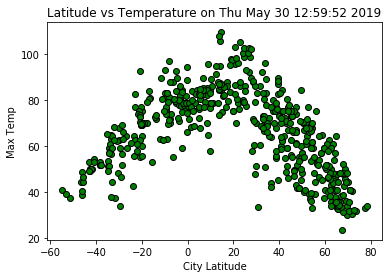

In [32]:
#plot
plt.scatter(weather_df['lat'],weather_df['max_temp'], facecolor = 'green', edgecolor = 'black')
plt.xlabel('City Latitude')
plt.ylabel('Max Temp')
plt.title(f'Latitude vs Temperature on {time_finish}')

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Latitude vs Humidity on Thu May 30 12:59:52 2019')

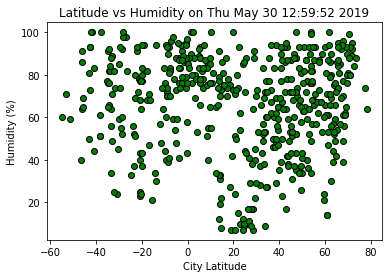

In [33]:
#plot
plt.scatter(weather_df['lat'],weather_df['humidity'], facecolor = 'green', edgecolor = 'black')
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Latitude vs Humidity on {time_finish}')

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Latitude vs Cloudiness on Thu May 30 12:59:52 2019')

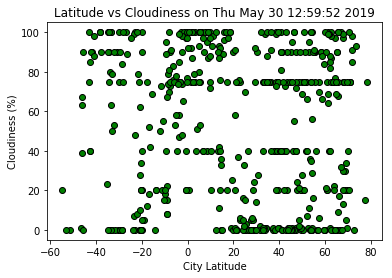

In [34]:
#plot
plt.scatter(weather_df['lat'],weather_df['cloudiness'], facecolor = 'green', edgecolor = 'black')
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Latitude vs Cloudiness on {time_finish}')

#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Latitude vs Wind Speed on Thu May 30 12:59:52 2019')

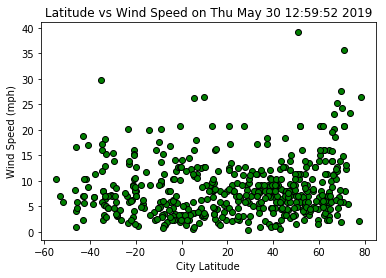

In [35]:
#plot
plt.scatter(weather_df['lat'],weather_df['wind_speed'], facecolor = 'green', edgecolor = 'black')
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Latitude vs Wind Speed on {time_finish}')

In [7]:
print('Conclusions:\n')
print('The maximum temperature of cities near the equator is in fact higher than those cities further away from the equator.\n')
print('There does not appear to be a significant relationship between the distance from the Equator and wind speed\n')
print('There does not appear to be a significant relationship between the distance from the Equator and cloudiness.')

Conclusions:

The maximum temperature of cities near the equator is in fact higher than those cities further away from the equator.

There does not appear to be a significant relationship between the distance from the Equator and wind speed

There does not appear to be a significant relationship between the distance from the Equator and cloudiness.
